# Predicting Delivery time using Sorting Time

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dtime = pd.read_csv("/Users/halders/Documents/Excelr/dataset/delivery_time.csv")

In [3]:
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
dtime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
#finding out correlation between delivery time and sorting time
dtime.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


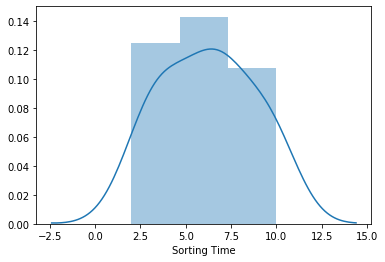

In [6]:
sns.distplot(dtime['Sorting Time'])

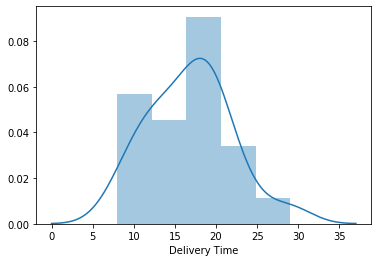

In [7]:
sns.distplot(dtime['Delivery Time'])

In [8]:
dtime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Fitting OLS  and training model

In [9]:
import statsmodels.api as smf
model = smf.OLS(dtime['Delivery Time'],dtime['Sorting Time']).fit()

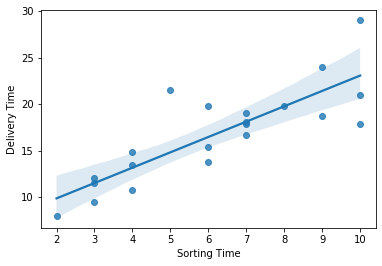

In [10]:
sns.regplot(x='Sorting Time', y = 'Delivery Time',data = dtime)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                    6.12e-15
Time:                        22:59:18   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
new_data = pd.Series([21.2,11.34])
pred_data = pd.DataFrame(new_data,columns=['Delivery Time'])

In [13]:
pred_data

,Delivery Time
0,21.20
1,11.34


### predicting  new data using model

In [14]:
model.predict(pred_data)

0    54.383221
1    29.089893
dtype: float64

<Figure size 1080x648 with 0 Axes>

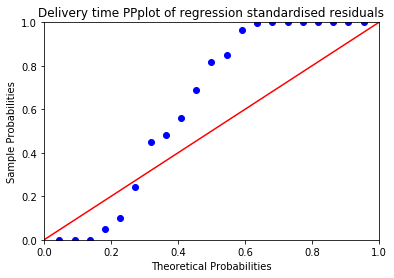

In [15]:
# Check for Normal Distribution of Residual

delivery_resid = model.resid
probplot = smf.ProbPlot(delivery_resid)
plt.figure (figsize= (15,9))
probplot.ppplot( line = '45' )
plt.title('Delivery time PPplot of regression standardised residuals')
plt.show()

Text(0, 0.5, 'Standardized Residuals')

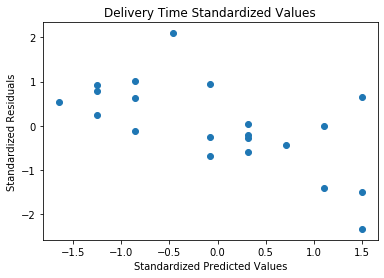

In [16]:
# Checking for hetroscedasity

def get_scandardized_values ( vals ):
    return (vals - vals.mean()) / vals.std()

plt.scatter(get_scandardized_values(model.fittedvalues),get_scandardized_values(delivery_resid))
plt.title("Delivery Time Standardized Values")
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residuals")

####  Inference : the model doesnt follow a funnel like structure , so the we can say that the residuals have constant variance and are random , so homoscedasticty.

# Building predicting model for Salary Hike

In [17]:
salary = pd.read_csv("/Users/halders/Documents/Excelr/dataset/Salary_Data.csv")

In [18]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [19]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [20]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


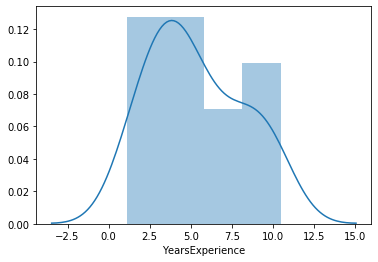

In [21]:
sns.distplot(salary['YearsExperience'])

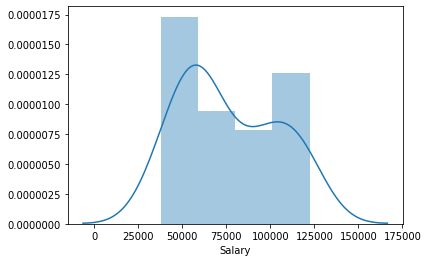

In [22]:
sns.distplot(salary['Salary'])

In [23]:
# building OLS model to predict Salary based on Years of Experience
import statsmodels.api as smf
model_salary = smf.OLS(salary['Salary'],salary['YearsExperience']).fit()

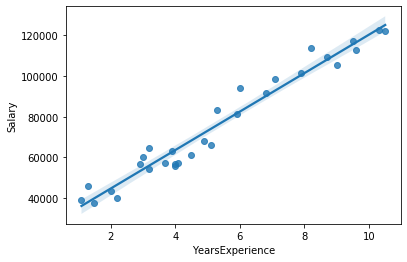

In [24]:
sns.regplot(x = salary['YearsExperience'],y= salary['Salary'])

In [25]:
model_salary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                    2.56e-24
Time:                        22:59:19   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
new_data = pd.Series([12,3.5,4,8.9,32,2,21,11.2])

In [27]:
salary_pred = pd.DataFrame(new_data,columns= ['YearsExperience'])

### Predicting Salary based on years of experience.

In [28]:
model_salary.predict(salary_pred)

0    159059.261453
1     46392.284590
2     53019.753818
3    117968.952244
4    424158.030541
5     26509.876909
6    278353.707543
7    148455.310689
dtype: float64

<Figure size 1080x648 with 0 Axes>

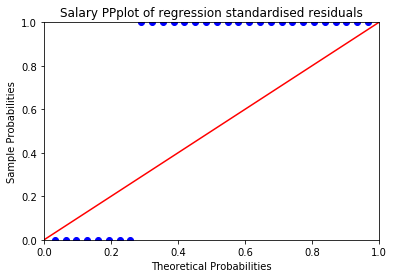

In [31]:
# Check for Normal Distribution of Residual

salary_resid = model_salary.resid
probplot_sal = smf.ProbPlot(salary_resid)
plt.figure (figsize= (15,9))
probplot_sal.ppplot( line = '45' )
plt.title('Salary PPplot of regression standardised residuals')
plt.show()

Text(0, 0.5, 'Standardized Residuals')

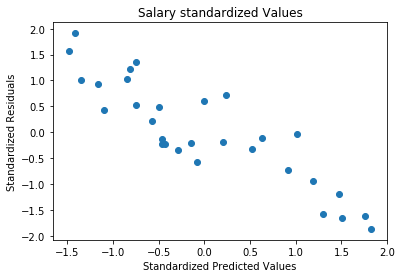

In [33]:
# Checking for hetroscedasity

def get_scandardized_values_sal ( vals ):
    return (vals - vals.mean()) / vals.std()

plt.scatter(get_scandardized_values_sal(model_salary.fittedvalues),get_scandardized_values_sal(salary_resid))
plt.title("Salary standardized Values")
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residuals")

#### Here we can say that the values are not random and follow  a trend, so homosckedasticty is follow.


### as the delivery time model ppplot residuls are closer to the daigonal and is homosckedastic in nature, we can say that the delivery time model is the better model among the two.